<a href="https://colab.research.google.com/github/maciejmochocki/MyRepo/blob/main/Zadanie3v2PoprawaMaciejMochocki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import sys, os
if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/coursera/week2_model_based/mdp.py

In [2]:
transition_probs = {
    'Start': {
        'right': {'X': 1},
    },
    'X': {
        'left': {'Start': 0.9, 'Y': 0.1},
        "right": {'Goal': 1},
        'down': {'Y': 1}
    },
    'Y': {
        'up': {'X': 0.75, 'Z': 0.25},
        'right': {'Z': 1}
    },
    'Z': {
        'up': {'Y': 0.5, 'Goal': 0.5},
    },
    'Goal': {
    }
}
rewards = {
    'Z': {'up': {'Goal': +100}},
}

from mdp import MDP
mdp = MDP(transition_probs, rewards, initial_state='Start')

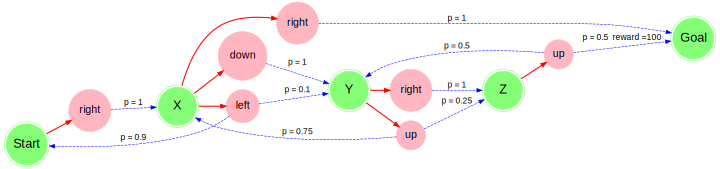

In [3]:
from mdp import has_graphviz
from IPython.display import display

if has_graphviz:
    from mdp import plot_graph
    display(plot_graph(mdp))

In [7]:
import random
state = mdp.reset()

for t in range(200):

  action = random.choice(mdp.get_possible_actions(state))
  observation, reward, done, info = mdp.step(action)
  state = observation
  if done:
    break

  print(t, observation, reward, done)

0 X 0.0 False
1 Y 0.0 False
2 X 0.0 False
3 Y 0.0 False
4 X 0.0 False
5 Y 0.0 False
6 Z 0.0 False
7 Y 0.0 False
8 X 0.0 False
9 Y 0.0 False
10 Z 0.0 False


In [8]:
def get_action_value(mdp, state_values, state, action, gamma):
  Q = 0.

  for next_state in mdp.get_next_states(state, action):
    
    prob = mdp.get_transition_prob(state, action, next_state)
    reward = mdp.get_reward(state, action, next_state)
    Q += prob * (reward + (gamma * state_values[next_state]))

  return Q

In [9]:
def get_new_state_value(mdp, state_values, state, gamma):
  
  if mdp.is_terminal(state):
    return 0

  return max([get_action_value(mdp, state_values, state, action, gamma) for action in mdp.get_possible_actions(state)])

In [10]:
gamma = 0.95
num_iter = 100
min_diff = 0.001

state_values = {s: 0 for s in mdp.get_all_states()}

for t in range(num_iter):

    new_state_values = {state: get_new_state_value(mdp, state_values, state, gamma) for state in mdp.get_all_states()}

    diff = max(abs(new_state_values[s] - state_values[s]) for s in mdp.get_all_states())

    print(t, diff, state_values)

    state_values = new_state_values

    if diff < min_diff:
        break

0 50.0 {'Start': 0, 'X': 0, 'Y': 0, 'Z': 0, 'Goal': 0}
1 47.5 {'Start': 0.0, 'X': 0.0, 'Y': 0.0, 'Z': 50.0, 'Goal': 0}
2 45.125 {'Start': 0.0, 'X': 0.0, 'Y': 47.5, 'Z': 50.0, 'Goal': 0}
3 42.86875 {'Start': 0.0, 'X': 45.125, 'Y': 47.5, 'Z': 72.5625, 'Goal': 0}
4 20.36265625 {'Start': 42.86875, 'X': 45.125, 'Y': 68.934375, 'Z': 72.5625, 'Goal': 0}
5 19.3445234375 {'Start': 42.86875, 'X': 65.48765625, 'Y': 68.934375, 'Z': 82.743828125, 'Goal': 0}
6 9.188648632812487 {'Start': 62.2132734375, 'X': 65.48765625, 'Y': 78.60663671875, 'Z': 82.743828125, 'Goal': 0}
7 8.729216201171859 {'Start': 62.2132734375, 'X': 74.67630488281249, 'Y': 78.60663671875, 'Z': 87.33815244140624, 'Goal': 0}
8 4.146377695556637 {'Start': 70.94248963867186, 'X': 74.67630488281249, 'Y': 82.97124481933592, 'Z': 87.33815244140624, 'Goal': 0}
9 3.9390588107788034 {'Start': 70.94248963867186, 'X': 78.82268257836913, 'Y': 82.97124481933592, 'Z': 89.41134128918456, 'Goal': 0}
10 1.871052935119934 {'Start': 74.8815484494506

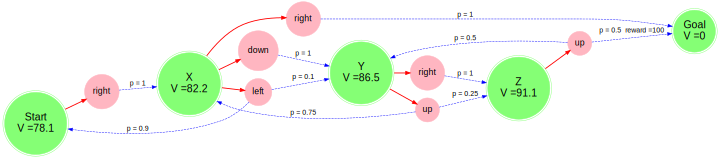

In [11]:
if has_graphviz:
  from mdp import plot_graph_with_state_values
  display(plot_graph_with_state_values(mdp, state_values))

In [13]:
def get_optimal_action(mdp, state_values, state, gamma):
    if mdp.is_terminal(state):
        return None
    
    action_values = [get_action_value(mdp, state_values, state, action, gamma) for action in mdp.get_possible_actions(state)]
    argmax_index = np.argmax(action_values)
    return mdp.get_possible_actions(state)[argmax_index]

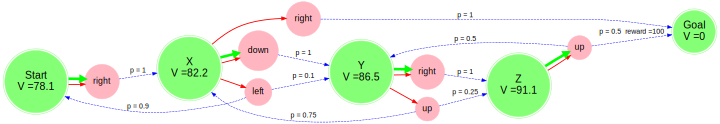

In [14]:
if has_graphviz:
    from mdp import plot_graph_optimal_strategy_and_state_values
    display(plot_graph_optimal_strategy_and_state_values(mdp, state_values, get_action_value))